In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
eps_data = pd.read_csv("Processed_EPS.csv", index_col=0)

In [3]:
eps_data

,Stkcd,Accper,Annodt,sue_decile,ShortName,Typrep,ue,sue
0,1,2015-12-31,2016-03-10,4.0,平安银行,A,-0.133213,-1.010402
1,1,2016-06-30,2016-08-12,3.0,平安银行,A,-0.093730,-0.681643
2,1,2016-12-31,2017-03-17,1.0,平安银行,A,-0.118138,-4.376467
3,1,2017-06-30,2017-08-11,6.0,平安银行,A,0.015259,0.227259
4,1,2017-12-31,2018-03-15,6.0,平安银行,A,0.019103,0.266086
...,...,...,...,...,...,...,...,...
36889,605333,2022-12-31,2023-04-26,9.0,沪光股份,A,0.168227,1.125903
36890,605336,2022-12-31,2023-04-21,2.0,帅丰电器,A,-0.429538,-1.463699
36891,605358,2022-12-31,2023-04-22,3.0,立昂微,A,-0.601820,-1.223066
36892,605366,2022-12-31,2023-03-15,4.0,宏柏新材,A,-0.221344,-0.660678


In [4]:
trading_date_list = os.listdir ("individual_stock_return")

In [5]:
trading_date_list[-120]

'2022-07-08'

As we need the abnormal stock return 120 days after the annodt date, which means the statement published after 2022-07-08 is useless. I drop them.

In [6]:
eps_data = eps_data[eps_data.loc[:, "Annodt"] < "2022-07-08"]

In [7]:
def binary_search(target: "str", dates: list[str]) -> int:
    """
    this func is used to search the index of a date. If the date is not in the index, just return the index of time that is just after the date. 
    """
    l = 0
    r = len(dates) - 1
    while (l < r):
        mid = (l + r)//2
        if dates[mid] < target:
            l = mid + 1
        elif dates[mid] == target:
            return mid
        else:
            r = mid
    return (l + r)//2

In [8]:
def cal_CAR(eps: pd.DataFrame) -> pd.DataFrame:
    path = r"individual_stock_return"
    date = binary_search(eps.loc[:, "Annodt"].iloc[0], trading_date_list)
    print(date)
    data_list = []
    index_row = eps.loc[:, "Stkcd"].unique()
    for i in trading_date_list[date - 120:date + 121]:
        data = pd.read_csv(path + "/" + i, index_col=0)
        data = data.set_index("Stkcd")
        index_copy = []
        for j in index_row:
            if j in data.index:
                index_copy.append(j)
        index_row = index_copy
        if len(index_row) == 0:
            return 
        data = data.loc[index_row]
        data_list.append(data)
    data = pd.concat(data_list, axis = 0)
    data = data.loc[index_row]
    result = data.loc[:, "AR"].groupby("Stkcd").cumsum().to_frame()
    result.columns = ["CAR"]
    result.loc[:, "ind"] = list(range(-120, 121))*int(len(result)/241)
    print(result)
    return result

In [9]:
CAR = eps_data.groupby("Annodt").apply(cal_CAR)

737
            CAR  ind
Stkcd               
667    0.054564 -120
667    0.046840 -119
667    0.017462 -118
667    0.006546 -117
667    0.011609 -116
...         ...  ...
667   -0.326368  116
667   -0.325884  117
667   -0.325198  118
667   -0.227947  119
667   -0.252907  120

[241 rows x 2 columns]
737
741
742
742
            CAR  ind
Stkcd               
2359   0.035600 -120
2359   0.013557 -119
2359   0.008262 -118
2359   0.017643 -117
2359   0.038811 -116
...         ...  ...
2359   0.564446  116
2359   0.561047  117
2359   0.543313  118
2359   0.561846  119
2359   0.543412  120

[241 rows x 2 columns]
743
             CAR  ind
Stkcd                
600116 -0.012410 -120
600116 -0.028032 -119
600116 -0.037578 -118
600116 -0.007667 -117
600116  0.005319 -116
...          ...  ...
600116  0.609691  116
600116  0.601379  117
600116  0.591507  118
600116  0.585360  119
600116  0.596309  120

[241 rows x 2 columns]
745
746
             CAR  ind
Stkcd                
600063 -0.023988 -12

             CAR  ind
Stkcd                
550    -0.013173 -120
550    -0.026223 -119
550    -0.029422 -118
550    -0.039607 -117
550    -0.048957 -116
...          ...  ...
601607 -0.252995  116
601607 -0.248589  117
601607 -0.252359  118
601607 -0.265857  119
601607 -0.265921  120

[2892 rows x 2 columns]
777
             CAR  ind
Stkcd                
2342   -0.006679 -120
2342   -0.020751 -119
2342   -0.014554 -118
2342   -0.033142 -117
2342   -0.029116 -116
...          ...  ...
600660 -0.049703  116
600660 -0.043598  117
600660 -0.040181  118
600660 -0.044311  119
600660 -0.053427  120

[723 rows x 2 columns]
778
             CAR  ind
Stkcd                
99      0.054854 -120
99      0.023139 -119
99      0.060184 -118
99      0.046548 -117
99      0.016325 -116
...          ...  ...
600963 -0.113457  116
600963 -0.080430  117
600963 -0.094065  118
600963 -0.120644  119
600963 -0.081926  120

[4579 rows x 2 columns]
779
             CAR  ind
Stkcd                
900    -0.00

             CAR  ind
Stkcd                
501    -0.011144 -120
501    -0.013018 -119
501    -0.005694 -118
501    -0.011498 -117
501    -0.019308 -116
...          ...  ...
601928 -0.403365  116
601928 -0.405932  117
601928 -0.408893  118
601928 -0.404802  119
601928 -0.409608  120

[4338 rows x 2 columns]
800
             CAR  ind
Stkcd                
417    -0.015753 -120
417    -0.016092 -119
417    -0.012322 -118
417    -0.022664 -117
417    -0.029820 -116
...          ...  ...
603366 -0.147730  116
603366 -0.146258  117
603366 -0.159497  118
603366 -0.137509  119
603366 -0.159250  120

[11327 rows x 2 columns]
801
             CAR  ind
Stkcd                
69      0.003468 -120
69     -0.005664 -119
69     -0.000109 -118
69     -0.000633 -117
69     -0.011342 -116
...          ...  ...
603123 -0.194670  116
603123 -0.133074  117
603123 -0.137032  118
603123 -0.147238  119
603123 -0.133040  120

[8917 rows x 2 columns]
801
             CAR  ind
Stkcd                
156    -0.

             CAR  ind
Stkcd                
2023   -0.006271 -120
2023   -0.016544 -119
2023    0.014831 -118
2023   -0.003078 -117
2023   -0.023227 -116
...          ...  ...
601339 -0.212546  116
601339 -0.213807  117
601339 -0.214709  118
601339 -0.220586  119
601339 -0.220936  120

[2410 rows x 2 columns]
875
             CAR  ind
Stkcd                
418    -0.023586 -120
418    -0.025549 -119
418    -0.045938 -118
418    -0.048365 -117
418    -0.060382 -116
...          ...  ...
601999 -0.079061  116
601999 -0.085465  117
601999 -0.088427  118
601999 -0.088777  119
601999 -0.088066  120

[5784 rows x 2 columns]
876
             CAR  ind
Stkcd                
708    -0.004136 -120
708     0.002426 -119
708    -0.011285 -118
708    -0.025895 -117
708    -0.032161 -116
...          ...  ...
601677 -0.095164  116
601677 -0.096889  117
601677 -0.094574  118
601677 -0.096153  119
601677 -0.076596  120

[1928 rows x 2 columns]
877
             CAR  ind
Stkcd                
1      -0.0

            CAR  ind
Stkcd               
2135   0.000937 -120
2135   0.020150 -119
2135   0.042788 -118
2135   0.029921 -117
2135   0.017560 -116
...         ...  ...
2135  -0.116609  116
2135  -0.071693  117
2135  -0.086848  118
2135  -0.004052  119
2135   0.028291  120

[241 rows x 2 columns]
1002
            CAR  ind
Stkcd               
608   -0.022009 -120
608   -0.038089 -119
608   -0.061889 -118
608   -0.064386 -117
608   -0.023705 -116
...         ...  ...
2277  -0.083076  116
2277  -0.067013  117
2277  -0.068700  118
2277  -0.078050  119
2277  -0.078355  120

[482 rows x 2 columns]
1003
1004
            CAR  ind
Stkcd               
677   -0.006608 -120
677    0.008501 -119
677    0.025417 -118
677   -0.005006 -117
677   -0.006746 -116
...         ...  ...
677   -0.250996  116
677   -0.249165  117
677   -0.217713  118
677   -0.227026  119
677   -0.188049  120

[241 rows x 2 columns]
1005
             CAR  ind
Stkcd                
708     0.000771 -120
708     0.013821 -119
7

             CAR  ind
Stkcd                
429    -0.007871 -120
429     0.013314 -119
429     0.019494 -118
429     0.015512 -117
429     0.019399 -116
...          ...  ...
601800  0.246864  116
601800  0.256741  117
601800  0.264010  118
601800  0.261677  119
601800  0.244468  120

[8917 rows x 2 columns]
1028
             CAR  ind
Stkcd                
14     -0.015474 -120
14      0.003697 -119
14      0.029970 -118
14      0.030786 -117
14      0.052777 -116
...          ...  ...
603333 -0.197289  116
603333 -0.202036  117
603333 -0.196583  118
603333 -0.199450  119
603333 -0.208293  120

[14701 rows x 2 columns]
1029
             CAR  ind
Stkcd                
11      0.004359 -120
11      0.061410 -119
11      0.124816 -118
11      0.189616 -117
11      0.153144 -116
...          ...  ...
603993  0.706892  116
603993  0.703273  117
603993  0.735631  118
603993  0.704181  119
603993  0.675224  120

[24823 rows x 2 columns]
1030
             CAR  ind
Stkcd                
60    

            CAR  ind
Stkcd               
627   -0.005862 -120
627   -0.009098 -119
627   -0.018742 -118
627    0.024848 -117
627    0.018116 -116
...         ...  ...
2714   0.966475  116
2714   0.972854  117
2714   0.976307  118
2714   0.959875  119
2714   0.967870  120

[482 rows x 2 columns]
1104
             CAR  ind
Stkcd                
600335 -0.009372 -120
600335  0.000383 -119
600335  0.002250 -118
600335 -0.002711 -117
600335 -0.002067 -116
...          ...  ...
600335 -0.044175  116
600335 -0.049987  117
600335 -0.043074  118
600335 -0.044222  119
600335 -0.095282  120

[241 rows x 2 columns]
1105
             CAR  ind
Stkcd                
2415   -0.006613 -120
2415    0.013883 -119
2415    0.023743 -118
2415    0.019750 -117
2415    0.031961 -116
...          ...  ...
600889 -0.382868  116
600889 -0.386032  117
600889 -0.389729  118
600889 -0.402450  119
600889 -0.411664  120

[723 rows x 2 columns]
1106
            CAR  ind
Stkcd               
2386  -0.010388 -120
2386 

             CAR  ind
Stkcd                
12     -0.002308 -120
12     -0.004010 -119
12     -0.009021 -118
12     -0.009816 -117
12     -0.018941 -116
...          ...  ...
601965 -0.149511  116
601965 -0.160668  117
601965 -0.164394  118
601965 -0.150839  119
601965 -0.148984  120

[19762 rows x 2 columns]
1127
             CAR  ind
Stkcd                
728    -0.008377 -120
728     0.002888 -119
728    -0.008798 -118
728     0.002632 -117
728    -0.006569 -116
...          ...  ...
603018 -0.101324  116
603018 -0.090390  117
603018 -0.097984  118
603018 -0.103745  119
603018 -0.104685  120

[12050 rows x 2 columns]
1128
             CAR  ind
Stkcd                
28      0.011381 -120
28      0.014951 -119
28     -0.004653 -118
28      0.016794 -117
28      0.008579 -116
...          ...  ...
601898  0.101021  116
601898  0.100277  117
601898  0.102379  118
601898  0.100167  119
601898  0.112777  120

[16870 rows x 2 columns]
1129
             CAR  ind
Stkcd                
16   

             CAR  ind
Stkcd                
795    -0.010422 -120
795     0.031672 -119
795     0.051131 -118
795     0.086722 -117
795     0.125534 -116
...          ...  ...
603518 -0.032674  116
603518 -0.021280  117
603518 -0.057951  118
603518 -0.075649  119
603518 -0.057783  120

[1446 rows x 2 columns]
1259
             CAR  ind
Stkcd                
26      0.013517 -120
26      0.002332 -119
26     -0.003782 -118
26     -0.011039 -117
26     -0.017532 -116
...          ...  ...
600207  0.159073  116
600207  0.151736  117
600207  0.137402  118
600207  0.138540  119
600207  0.127134  120

[2169 rows x 2 columns]
1259
            CAR  ind
Stkcd               
2649  -0.003361 -120
2649  -0.014641 -119
2649  -0.021804 -118
2649  -0.001192 -117
2649  -0.017376 -116
...         ...  ...
2649   0.110540  116
2649   0.109553  117
2649   0.117964  118
2649   0.105997  119
2649   0.110297  120

[241 rows x 2 columns]
1260
             CAR  ind
Stkcd                
418    -0.004567 -120


             CAR  ind
Stkcd                
21     -0.008079 -120
21     -0.002129 -119
21     -0.000257 -118
21     -0.018242 -117
21     -0.022135 -116
...          ...  ...
603869  0.050857  116
603869  0.051533  117
603869  0.026826  118
603869  0.018651  119
603869  0.007025  120

[7953 rows x 2 columns]
1281
             CAR  ind
Stkcd                
27     -0.003105 -120
27     -0.004067 -119
27      0.004885 -118
27     -0.001627 -117
27     -0.008618 -116
...          ...  ...
603338  0.602488  116
603338  0.606620  117
603338  0.557451  118
603338  0.560100  119
603338  0.606255  120

[7230 rows x 2 columns]
1282
             CAR  ind
Stkcd                
419    -0.009989 -120
419    -0.012237 -119
419    -0.023529 -118
419    -0.026172 -117
419    -0.032063 -116
...          ...  ...
600881 -0.008889  116
600881 -0.020716  117
600881 -0.020618  118
600881 -0.046716  119
600881 -0.064993  120

[5302 rows x 2 columns]
1282
             CAR  ind
Stkcd                
2050    

             CAR  ind
Stkcd                
557     0.029288 -120
557     0.017408 -119
557    -0.009012 -118
557    -0.010353 -117
557    -0.037948 -116
...          ...  ...
603002 -0.134936  116
603002 -0.131811  117
603002 -0.127400  118
603002 -0.149244  119
603002 -0.147461  120

[1446 rows x 2 columns]
1357
             CAR  ind
Stkcd                
2299    0.012540 -120
2299   -0.013245 -119
2299    0.002908 -118
2299   -0.036560 -117
2299   -0.040290 -116
...          ...  ...
600763  0.672580  116
600763  0.667561  117
600763  0.666227  118
600763  0.725451  119
600763  0.759145  120

[1446 rows x 2 columns]
1358
             CAR  ind
Stkcd                
49      0.019751 -120
49      0.018178 -119
49      0.025326 -118
49      0.030953 -117
49      0.045615 -116
...          ...  ...
601678 -0.025574  116
601678 -0.014071  117
601678 -0.053350  118
601678 -0.057126  119
601678 -0.068006  120

[2651 rows x 2 columns]
1359
             CAR  ind
Stkcd                
628    -

            CAR  ind
Stkcd               
55     0.010034 -120
55     0.013765 -119
55     0.001469 -118
55    -0.009499 -117
55     0.004017 -116
...         ...  ...
55     0.066868  116
55     0.066872  117
55     0.063747  118
55     0.062582  119
55     0.059103  120

[241 rows x 2 columns]
1479
             CAR  ind
Stkcd                
600738  0.028045 -120
600738  0.011495 -119
600738  0.016272 -118
600738 -0.006633 -117
600738 -0.016174 -116
...          ...  ...
600738  0.030379  116
600738  0.018425  117
600738  0.026239  118
600738  0.018317  119
600738  0.009804  120

[241 rows x 2 columns]
1480
            CAR  ind
Stkcd               
929   -0.002362 -120
929    0.009913 -119
929   -0.004392 -118
929    0.001908 -117
929   -0.005387 -116
...         ...  ...
2675   0.271236  116
2675   0.289873  117
2675   0.268965  118
2675   0.305057  119
2675   0.328184  120

[1446 rows x 2 columns]
1483
             CAR  ind
Stkcd                
600722 -0.089522 -120
600722 -0.1088

             CAR  ind
Stkcd                
628     0.014710 -120
628     0.006479 -119
628     0.004995 -118
628     0.054626 -117
628     0.046708 -116
...          ...  ...
601898 -0.098828  116
601898 -0.105244  117
601898 -0.111985  118
601898 -0.104099  119
601898 -0.124353  120

[3133 rows x 2 columns]
1506
             CAR  ind
Stkcd                
723     0.046675 -120
723     0.038444 -119
723     0.020118 -118
723     0.009276 -117
723     0.003021 -116
...          ...  ...
600603  0.265257  116
600603  0.262798  117
600603  0.256068  118
600603  0.244491  119
600603  0.259621  120

[1446 rows x 2 columns]
1507
             CAR  ind
Stkcd                
99      0.013080 -120
99      0.000554 -119
99      0.010552 -118
99      0.007880 -117
99      0.004976 -116
...          ...  ...
603969 -0.148619  116
603969 -0.152555  117
603969 -0.153955  118
603969 -0.162856  119
603969 -0.172719  120

[3615 rows x 2 columns]
1508
             CAR  ind
Stkcd                
100     

             CAR  ind
Stkcd                
12      0.019031 -120
12      0.010860 -119
12     -0.001157 -118
12      0.003634 -117
12      0.001092 -116
...          ...  ...
603889 -0.324470  116
603889 -0.318897  117
603889 -0.335215  118
603889 -0.327778  119
603889 -0.319550  120

[7230 rows x 2 columns]
1528
             CAR  ind
Stkcd                
23     -0.004148 -120
23     -0.033283 -119
23     -0.074289 -118
23     -0.093549 -117
23     -0.110767 -116
...          ...  ...
603968  0.055160  116
603968  0.051944  117
603968  0.054791  118
603968  0.058176  119
603968  0.051005  120

[10604 rows x 2 columns]
1529
             CAR  ind
Stkcd                
657    -0.007090 -120
657    -0.003842 -119
657    -0.002941 -118
657     0.000404 -117
657     0.009201 -116
...          ...  ...
603199  0.050335  116
603199  0.040504  117
603199  0.037593  118
603199  0.050710  119
603199  0.034054  120

[11327 rows x 2 columns]
1530
             CAR  ind
Stkcd                
17    

             CAR  ind
Stkcd                
546    -0.003090 -120
546    -0.011970 -119
546    -0.024792 -118
546    -0.029365 -117
546    -0.030142 -116
...          ...  ...
603023  0.014856  116
603023  0.013892  117
603023  0.045635  118
603023  0.014305  119
603023  0.000339  120

[3374 rows x 2 columns]
1603
             CAR  ind
Stkcd                
16      0.025712 -120
16      0.007142 -119
16     -0.005562 -118
16     -0.007395 -117
16      0.026024 -116
...          ...  ...
603606  0.268688  116
603606  0.248830  117
603606  0.233861  118
603606  0.224634  119
603606  0.234925  120

[1446 rows x 2 columns]
1604
             CAR  ind
Stkcd                
1      -0.016407 -120
1      -0.042004 -119
1      -0.037120 -118
1      -0.049564 -117
1      -0.040089 -116
...          ...  ...
603198  0.060678  116
603198  0.042584  117
603198  0.061595  118
603198  0.053788  119
603198  0.071519  120

[4338 rows x 2 columns]
1605
             CAR  ind
Stkcd                
421     

             CAR  ind
Stkcd                
2458   -0.016300 -120
2458   -0.015886 -119
2458   -0.052132 -118
2458   -0.054629 -117
2458   -0.071688 -116
...          ...  ...
600315 -0.004034  116
600315 -0.019028  117
600315 -0.056074  118
600315 -0.022054  119
600315 -0.023733  120

[482 rows x 2 columns]
1732
             CAR  ind
Stkcd                
601318 -0.008405 -120
601318 -0.011651 -119
601318 -0.012876 -118
601318  0.010285 -117
601318 -0.009597 -116
...          ...  ...
601318 -0.389646  116
601318 -0.379110  117
601318 -0.393245  118
601318 -0.379228  119
601318 -0.361276  120

[241 rows x 2 columns]
1733
             CAR  ind
Stkcd                
603677  0.010112 -120
603677  0.018558 -119
603677  0.011766 -118
603677 -0.021428 -117
603677 -0.000581 -116
...          ...  ...
603677 -0.180848  116
603677 -0.176202  117
603677 -0.149582  118
603677 -0.168847  119
603677 -0.171349  120

[241 rows x 2 columns]
1736
            CAR  ind
Stkcd               
2714   0.0277

             CAR  ind
Stkcd                
63     -0.013336 -120
63     -0.003240 -119
63     -0.029842 -118
63     -0.038149 -117
63     -0.036274 -116
...          ...  ...
603578 -0.009568  116
603578 -0.002555  117
603578 -0.013087  118
603578 -0.021656  119
603578 -0.020786  120

[15906 rows x 2 columns]
1758
             CAR  ind
Stkcd                
428     0.005138 -120
428     0.020397 -119
428     0.025850 -118
428     0.012384 -117
428     0.003571 -116
...          ...  ...
603993 -0.055231  116
603993 -0.068787  117
603993 -0.054210  118
603993 -0.063077  119
603993 -0.071168  120

[3615 rows x 2 columns]
1759
             CAR  ind
Stkcd                
31     -0.007997 -120
31      0.010186 -119
31      0.048009 -118
31      0.083230 -117
31      0.088352 -116
...          ...  ...
603997 -0.186495  116
603997 -0.201993  117
603997 -0.213883  118
603997 -0.229577  119
603997 -0.228229  120

[25305 rows x 2 columns]
1760
             CAR  ind
Stkcd                
876   

             CAR  ind
Stkcd                
12      0.013307 -120
12      0.009608 -119
12      0.015771 -118
12      0.014817 -117
12      0.023416 -116
...          ...  ...
603998 -0.379895  116
603998 -0.384620  117
603998 -0.390577  118
603998 -0.387104  119
603998 -0.387876  120

[68685 rows x 2 columns]
1782
            CAR  ind
Stkcd               
2411   0.004072 -120
2411  -0.001407 -119
2411   0.006673 -118
2411   0.021095 -117
2411   0.013799 -116
...         ...  ...
2411  -0.970030  116
2411  -0.978655  117
2411  -0.981715  118
2411  -1.029400  119
2411  -1.033165  120

[241 rows x 2 columns]
1791
             CAR  ind
Stkcd                
545    -0.005794 -120
545    -0.007233 -119
545    -0.000122 -118
545     0.003119 -117
545     0.018994 -116
...          ...  ...
603011 -0.041361  116
603011 -0.053985  117
603011 -0.062407  118
603011 -0.052204  119
603011 -0.048123  120

[1446 rows x 2 columns]
1793
            CAR  ind
Stkcd               
2783   0.007843 -120
27

             CAR  ind
Stkcd                
2138    0.015125 -120
2138    0.011534 -119
2138    0.024105 -118
2138    0.012044 -117
2138    0.031902 -116
...          ...  ...
603008  0.132896  116
603008  0.115223  117
603008  0.133096  118
603008  0.157768  119
603008  0.169695  120

[482 rows x 2 columns]
1836
             CAR  ind
Stkcd                
863     0.019189 -120
863     0.015524 -119
863     0.003611 -118
863    -0.022765 -117
863    -0.006461 -116
...          ...  ...
600753  0.610101  116
600753  0.613652  117
600753  0.621555  118
600753  0.581339  119
600753  0.582179  120

[1205 rows x 2 columns]
1837
             CAR  ind
Stkcd                
420     0.005803 -120
420    -0.005863 -119
420    -0.007501 -118
420    -0.006376 -117
420     0.067799 -116
...          ...  ...
603988  0.081922  116
603988  0.079180  117
603988  0.085801  118
603988  0.086399  119
603988  0.077063  120

[2169 rows x 2 columns]
1837
            CAR  ind
Stkcd               
2567  -0.06

             CAR  ind
Stkcd                
12     -0.033304 -120
12     -0.008557 -119
12     -0.024092 -118
12     -0.032152 -117
12      0.005157 -116
...          ...  ...
601929 -0.351681  116
601929 -0.331007  117
601929 -0.334922  118
601929 -0.341181  119
601929 -0.338580  120

[2410 rows x 2 columns]
1858
             CAR  ind
Stkcd                
19      0.015359 -120
19     -0.010462 -119
19     -0.015937 -118
19     -0.003227 -117
19     -0.029443 -116
...          ...  ...
603977  0.272222  116
603977  0.273545  117
603977  0.290445  118
603977  0.286432  119
603977  0.271470  120

[43380 rows x 2 columns]
1859
             CAR  ind
Stkcd                
27     -0.004668 -120
27     -0.012900 -119
27     -0.017176 -118
27     -0.030015 -117
27     -0.020985 -116
...          ...  ...
603991  0.894045  116
603991  0.900713  117
603991  0.897359  118
603991  0.901299  119
603991  0.893183  120

[42898 rows x 2 columns]
1860
             CAR  ind
Stkcd                
25    

             CAR  ind
Stkcd                
2013    0.003585 -120
2013   -0.015143 -119
2013   -0.036922 -118
2013    0.050136 -117
2013    0.000575 -116
...          ...  ...
603773 -0.438795  116
603773 -0.438297  117
603773 -0.439532  118
603773 -0.431716  119
603773 -0.443254  120

[964 rows x 2 columns]
1991
             CAR  ind
Stkcd                
712     0.008660 -120
712    -0.001638 -119
712    -0.011870 -118
712    -0.017175 -117
712     0.000095 -116
...          ...  ...
603659  0.765957  116
603659  0.758282  117
603659  0.698700  118
603659  0.701810  119
603659  0.764674  120

[5302 rows x 2 columns]
1992
             CAR  ind
Stkcd                
2564   -0.004197 -120
2564   -0.017103 -119
2564   -0.017195 -118
2564   -0.013337 -117
2564   -0.023822 -116
...          ...  ...
600961  0.465119  116
600961  0.438098  117
600961  0.423752  118
600961  0.433427  119
600961  0.405982  120

[1205 rows x 2 columns]
1993
             CAR  ind
Stkcd                
612     0

             CAR  ind
Stkcd                
88      0.007591 -120
88     -0.002319 -119
88     -0.008543 -118
88      0.003751 -117
88     -0.018852 -116
...          ...  ...
603990 -0.594675  116
603990 -0.621268  117
603990 -0.645129  118
603990 -0.645094  119
603990 -0.666194  120

[12773 rows x 2 columns]
2014
             CAR  ind
Stkcd                
2363   -0.001900 -120
2363   -0.007133 -119
2363   -0.012333 -118
2363   -0.012385 -117
2363   -0.015316 -116
...          ...  ...
603369 -0.085706  116
603369 -0.116647  117
603369 -0.102502  118
603369 -0.200242  119
603369 -0.199477  120

[723 rows x 2 columns]
2015
             CAR  ind
Stkcd                
8       0.011080 -120
8       0.016072 -119
8       0.016020 -118
8       0.011212 -117
8       0.005996 -116
...          ...  ...
603970  0.120188  116
603970  0.136458  117
603970  0.125490  118
603970  0.110611  119
603970  0.104759  120

[25787 rows x 2 columns]
2016
             CAR  ind
Stkcd                
10     

             CAR  ind
Stkcd                
416    -0.020646 -120
416    -0.037723 -119
416    -0.039827 -118
416    -0.006564 -117
416     0.004192 -116
...          ...  ...
603722  0.539187  116
603722  0.529675  117
603722  0.480397  118
603722  0.473211  119
603722  0.452034  120

[4579 rows x 2 columns]
2090
             CAR  ind
Stkcd                
2639    0.009232 -120
2639    0.028852 -119
2639    0.021846 -118
2639    0.016041 -117
2639    0.009028 -116
...          ...  ...
600338  1.214274  116
600338  1.220065  117
600338  1.180956  118
600338  1.207987  119
600338  1.206811  120

[482 rows x 2 columns]
2091
             CAR  ind
Stkcd                
100     0.032692 -120
100     0.032301 -119
100     0.016885 -118
100     0.020059 -117
100    -0.012625 -116
...          ...  ...
603936  0.093928  116
603936  0.076873  117
603936  0.066598  118
603936  0.055768  119
603936  0.033279  120

[8435 rows x 2 columns]
2092
             CAR  ind
Stkcd                
545     0

             CAR  ind
Stkcd                
2138   -0.033591 -120
2138   -0.028338 -119
2138   -0.035511 -118
2138   -0.043424 -117
2138   -0.044776 -116
...          ...  ...
603897  0.068960  116
603897  0.114989  117
603897  0.072837  118
603897  0.039281  119
603897  0.025780  120

[1205 rows x 2 columns]
2222
             CAR  ind
Stkcd                
2379    0.035938 -120
2379    0.062876 -119
2379    0.104224 -118
2379    0.089984 -117
2379    0.097262 -116
...          ...  ...
600821  0.459644  116
600821  0.423737  117
600821  0.520912  118
600821  0.500055  119
600821  0.520864  120

[723 rows x 2 columns]
2223
            CAR  ind
Stkcd               
2843   0.005352 -120
2843  -0.013870 -119
2843  -0.010528 -118
2843  -0.039671 -117
2843  -0.074828 -116
...         ...  ...
2843   0.874326  116
2843   0.841433  117
2843   0.816741  118
2843   0.851247  119
2843   0.803439  120

[241 rows x 2 columns]
2224
             CAR  ind
Stkcd                
600231  0.004773 -120
6

             CAR  ind
Stkcd                
2       0.031517 -120
2       0.018857 -119
2       0.000115 -118
2       0.041480 -117
2       0.065333 -116
...          ...  ...
603997  0.395183  116
603997  0.386234  117
603997  0.400062  118
603997  0.355601  119
603997  0.427544  120

[48200 rows x 2 columns]
2246
             CAR  ind
Stkcd                
541     0.003736 -120
541    -0.006531 -119
541    -0.003935 -118
541    -0.001159 -117
541    -0.008387 -116
...          ...  ...
603896  0.093135  116
603896  0.075975  117
603896  0.081130  118
603896  0.073960  119
603896  0.112838  120

[3856 rows x 2 columns]
2247
             CAR  ind
Stkcd                
548     0.021288 -120
548     0.019631 -119
548     0.021744 -118
548     0.013761 -117
548     0.005986 -116
...          ...  ...
603380  0.082127  116
603380  0.069584  117
603380  0.109184  118
603380  0.076278  119
603380  0.101002  120

[6266 rows x 2 columns]
2248
             CAR  ind
Stkcd                
863    

In [10]:
CAR.dropna(inplace=True)

In [11]:
CAR = CAR.reset_index()

In [12]:
def get_decile(data: pd.DataFrame) -> pd.DataFrame:
    eps_data_selected = eps_data.loc[eps_data.loc[:, "Annodt"] == data.loc[:, "Annodt"].iloc[0]]
    eps_data_selected = eps_data_selected.loc[eps_data.loc[:, "Stkcd"] == data.loc[:, "Stkcd"].iloc[0]]
    data.loc[:, "decile"] = int(eps_data_selected.loc[:, "sue_decile"].iloc[0])
    data.loc[:, "Accper"] = eps_data_selected.loc[:, "Accper"].iloc[0]
    return data

In [13]:
CAR_with_decile = CAR.groupby(["Annodt", "Stkcd"]).apply(get_decile)

In [14]:
CAR_one_mean = CAR_with_decile.loc[:, ["decile", "ind", "Accper", "CAR"]].groupby(["decile", "ind", "Accper"]).mean()

In [15]:
CAR_one_mean = CAR_one_mean.reset_index()

In [16]:
CAR_double_mean = CAR_one_mean.loc[:, ["decile", "ind", "CAR"]].groupby(["decile", "ind"]).mean()

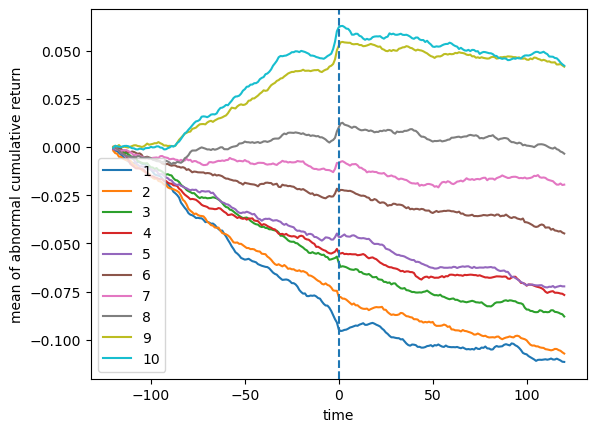

In [18]:
CAR_double_mean = CAR_double_mean.reset_index()
for i in range(1, 11):
    plt.plot(range(-120, 121), CAR_double_mean[CAR_double_mean.loc[:, "decile"] == i].loc[:, "CAR"], label = i)
plt.axvline(0, ls = "--")
plt.ylabel("mean of abnormal cumulative return")
plt.xlabel("time")
plt.legend()